In [2]:
# Getting the dependencies
!pip install pandas

In [3]:
%load_ext rpy2.ipython

In [4]:
import pandas as pd
df = pd.read_csv("BlueChipDataset.csv")


In [5]:
df.count()

df.describe()
df.drop

<bound method DataFrame.drop of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Attrited Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10163  778929783  Attrited Customer            40      M                3   
10164  716996583  Attrited Customer            19      M                3   
10165  713053383  Attrited Customer            18      M                3   
10166  803595858  Attrited Customer            56      F                3   
10167  710754933  Attrited Customer            61      F                0   

      Education_Level Marital_Status Income

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
count,1.016800e+04,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.00000,10168.000000
mean,7.392792e+08,44.734264,2.345692,35.997443,3.809107,2.343725,2.44640,8572.029770
std,3.695261e+07,10.044976,1.298094,7.996655,1.558173,1.010794,1.10289,9040.872045
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.00000,1438.300000
25%,7.130102e+08,40.000000,1.000000,32.000000,3.000000,2.000000,2.00000,2540.000000
50%,7.179516e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.00000,4511.500000
75%,7.732911e+08,51.000000,3.000000,40.000000,5.000000,3.000000,3.00000,10960.250000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.00000,34516.000000


In [7]:
##### R BELOW HERE

In [8]:
%%R 
library(tidyverse)
data = read_csv("BlueChipDataset.csv")

colnames(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.3     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 10168 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Cat...
dbl (8): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Rel...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
 [1] "CLIENTNUM"                "Attrition_Flag"          
 [3] "Customer_Age"             "Gender"                  
 [5] "Dependent_count"          "Education_Level"         
 [7] 

In [9]:
%%R
# factoring the income 
data$Income_Category = as.factor(data$Income_Category)
data %>% mutate_if(is.character, as.factor)

# A tibble: 10,168 × 14
   CLIENTNUM Attrition_Flag  Customer_Age Gender Dependent_count Education_Level
       <dbl> <fct>                  <dbl> <fct>            <dbl> <fct>          
 1 768805383 Attrited Custo…           45 M                    3 High School    
 2 818770008 Existing Custo…           49 F                    5 Graduate       
 3 713982108 Existing Custo…           51 M                    3 Graduate       
 4 769911858 Existing Custo…           40 F                    4 High School    
 5 709106358 Existing Custo…           40 M                    3 Uneducated     
 6 713061558 Existing Custo…           44 M                    2 Graduate       
 7 710930508 Attrited Custo…           21 M                    3 College        
 8 719661558 Attrited Custo…           19 M                    2 College        
 9 708790833 Existing Custo…           42 M                    5 Uneducated     
10 710821833 Existing Custo…           65 M                    1 Unknown        
# … 

## Charts of current data

### Gender count chart

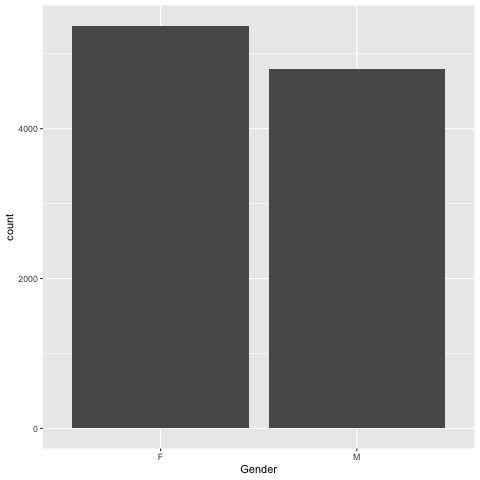

In [10]:
%%R
ggplot(data, aes(x = Gender)) + geom_bar()

### Chart for number of dependents

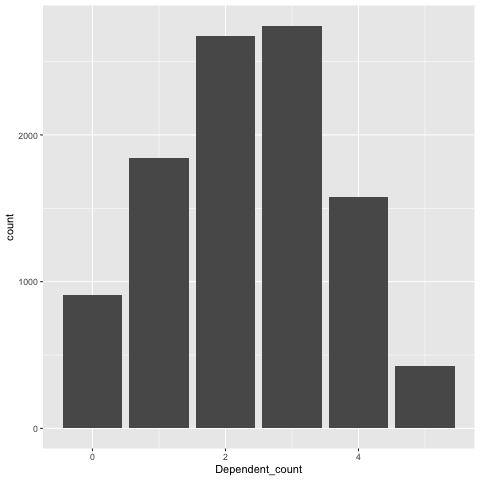

In [11]:
%%R
ggplot(data, aes(x = Dependent_count)) + geom_bar()

### Chart showing distribution of age

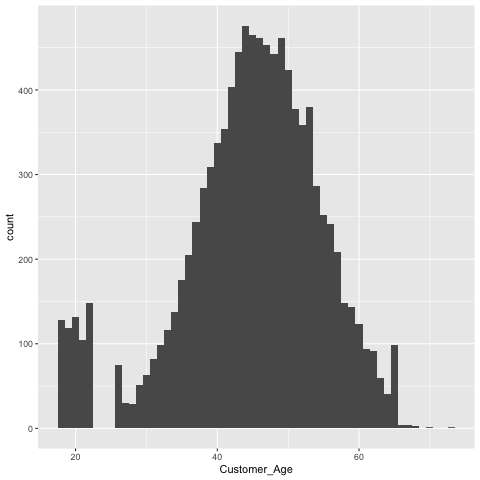

In [12]:
%%R
ggplot(data, aes(x = Customer_Age)) + geom_histogram(binwidth = 1)

### Chart showing the count of education level

In [13]:
%%R # test
ggplot(data, aes(x = Education_Level)) + geom_bar()

NULL


### Chart showing the count in different income categories

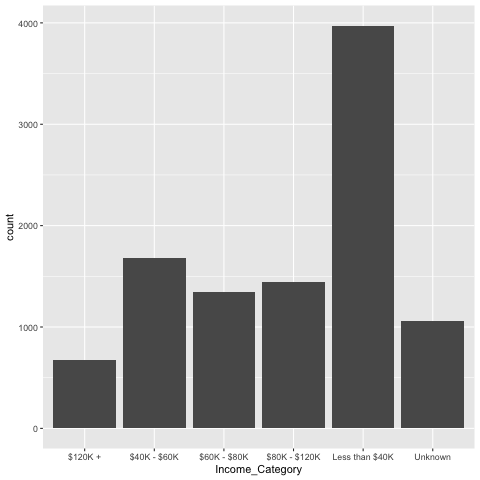

In [14]:
%%R
ggplot(data, aes(x = Income_Category)) + geom_bar()

### Chart showing the count for different card category

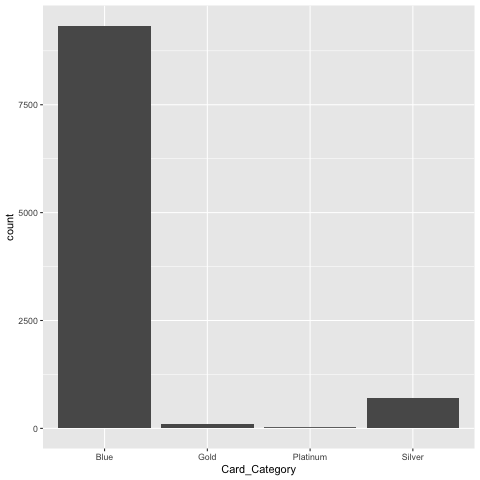

In [15]:
%%R
ggplot(data, aes(x = Card_Category)) + geom_bar()

## Identification of the Problem
It seems that the majority of the users are using the blue card
Assuming that the users are spending the maximum amount of the card on monthly basis for the first 3 months, based on the cashback in the first quarter the companies would be losing about 10 dollars per user who maxes out their card.

### Reorienting
The grpah below shows that half of the holder of the blue card have the attrition flag suggesting their lack of interest in this card and this is consistant with the first review in the case

In [38]:
%%R
table(data$Card_Category)


    Blue     Gold Platinum   Silver 
    9334      111       20      703 


In [93]:
%%R
filter(data, Attrition_Flag == "Attrited Customer")$Card_Category |> table()


    Blue     Gold Platinum   Silver 
    1890       24        6      272 


## Which card do high income individuals get?

##### Finding the categories of income in the data

In [36]:
%%R
unique(data$Income_Category)

[1] $60K - $80K    Less than $40K $80K - $120K   $40K - $60K    $120K +       
[6] Unknown       
6 Levels: $120K + $40K - $60K $60K - $80K $80K - $120K ... Unknown


In [107]:
%%R
filter(data, Income_Category == "$120K +" )$Card_Category |> table()


    Blue     Gold Platinum   Silver 
     597       15        4       63 


In [96]:
%%R
filter(data, Card_Category == "Platinum" & Income_Category == "Less than $40K") |> summarize(mean = mean(Credit_Limit))

# A tibble: 1 × 1
    mean
   <dbl>
1 22163.


In [105]:
%%R
filter(data, Income_Category == "$120K +", Attrition_Flag == "Attrited Customer") |> group_by(Card_Category) |> summarize(n = n())

# A tibble: 2 × 2
  Card_Category     n
  <chr>         <int>
1 Blue            101
2 Silver           15


In [106]:
%%R
filter(data, Income_Category == "$120K +", Attrition_Flag != "Attrited Customer") |> group_by(Card_Category) |> summarize(n = n())

# A tibble: 4 × 2
  Card_Category     n
  <chr>         <int>
1 Blue            496
2 Gold             15
3 Platinum          4
4 Silver           48


In [108]:
%%R
filter(data, Income_Category == "Less than $40K", Attrition_Flag == "Attrited Customer") |> group_by(Card_Category) |> summarize(n = n())

# A tibble: 4 × 2
  Card_Category     n
  <chr>         <int>
1 Blue           1057
2 Gold             13
3 Platinum          5
4 Silver          133


In [109]:
%%R
filter(data, Income_Category == "Less than $40K", Attrition_Flag != "Attrited Customer") |> group_by(Card_Category) |> summarize(n = n())

# A tibble: 4 × 2
  Card_Category     n
  <chr>         <int>
1 Blue           2651
2 Gold             17
3 Platinum          1
4 Silver           96


So it seems like that the majority of the high income customers are using the blue card despite it being the base card of the corp

In [45]:
%%R
data |> group_by(Card_Category, Gender) |> summarize(mean = mean(Credit_Limit))

`summarise()` has grouped output by 'Card_Category'. You can override using the
`.groups` argument.
# A tibble: 8 × 3
# Groups:   Card_Category [4]
  Card_Category Gender   mean
  <chr>         <chr>   <dbl>
1 Blue          F       4289.
2 Blue          M      10952.
3 Gold          F      20967 
4 Gold          M      32543.
5 Platinum      F      26281.
6 Platinum      M      33558.
7 Silver        F      15557.
8 Silver        M      24587.


In [74]:
%%R
options(max.print = 99999)
data$Income_Category = as.factor(data$Income_Category)
filter(data, Income_Category == "$80K - $120K") |> group_by(Education_Level) |> summarize(mean = mean(Customer_Age))

# A tibble: 7 × 2
  Education_Level  mean
  <chr>           <dbl>
1 College          45.8
2 Doctorate        47.1
3 Graduate         46.4
4 High School      46.7
5 Post-Graduate    44.7
6 Uneducated       46.5
7 Unknown          46.5


In [91]:
%%R
filter(data, Customer_Age <= 40) |> group_by(Income_Category) |> summarize(n = n() / 2868 * 100)

# A tibble: 6 × 2
  Income_Category     n
  <fct>           <dbl>
1 $120K +          4.01
2 $40K - $60K     14.7 
3 $60K - $80K     10.8 
4 $80K - $120K    11.0 
5 Less than $40K  50.5 
6 Unknown          9.03


In [92]:
%%R
filter(data, Customer_Age >= 40) |> group_by(Income_Category) |> summarize(n = n() / 7637 * 100)

# A tibble: 6 × 2
  Income_Category     n
  <fct>           <dbl>
1 $120K +          7.70
2 $40K - $60K     17.2 
3 $60K - $80K     14.1 
4 $80K - $120K    15.5 
5 Less than $40K  34.6 
6 Unknown         10.9 


In [83]:
%%R
filter(data, Customer_Age <= 40) |> summarize(n = n())

# A tibble: 1 × 1
      n
  <int>
1  2868


In [85]:
%%R
filter(data, Customer_Age >= 40) |> summarize(n = n())

# A tibble: 1 × 1
      n
  <int>
1  7637
